In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_dataset/train',
    target_size=(256,256),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 1731 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10,
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_dataset/val',
    target_size=(256,256),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 246 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/plant_dataset/test',
    target_size=(256,256),
    batch_size = 32,
    class_mode = 'sparse',
)

Found 498 images belonging to 2 classes.


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
1731/32

54.09375

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=54,
    batch_size=32,
    validation_data=val_generator,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
54/54 [==============================] - 897s 16s/step - loss: 0.6567 - accuracy: 0.6363 - val_loss: 0.5274 - val_accuracy: 0.7292
Epoch 2/20
54/54 [==============================] - 41s 762ms/step - loss: 0.5038 - accuracy: 0.7899 - val_loss: 0.3224 - val_accuracy: 0.9167
Epoch 3/20
54/54 [==============================] - 31s 568ms/step - loss: 0.3025 - accuracy: 0.9005 - val_loss: 0.2727 - val_accuracy: 0.9115
Epoch 4/20
54/54 [==============================] - 31s 584ms/step - loss: 0.1636 - accuracy: 0.9529 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 5/20
54/54 [==============================] - 30s 554ms/step - loss: 0.1177 - accuracy: 0.9700 - val_loss: 0.0444 - val_accuracy: 0.9844
Epoch 6/20
54/54 [==============================] - 29s 542ms/step - loss: 0.0681 - accuracy: 0.9835 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 7/20
54/54 [==============================] - 29s 545ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0061 - val_accuracy: 1.0000


In [ ]:
scores = model.evaluate(test_generator)

16/16 [==============================] - 219s 15s/step - loss: 0.0012 - accuracy: 1.0000


In [ ]:
scores

[0.0012080040760338306, 1.0]

In [ ]:
class_names = list(train_generator.class_indices.keys())

first image to predict
actual label: Pepper__bell___healthy
1/1 [==============================] - 0s 29ms/step
predicted label: Pepper__bell___healthy


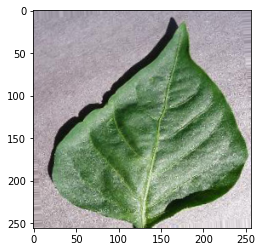

In [ ]:
import numpy as np

for images_batch, labels_batch in test_generator:

  first_image = images_batch[0]
  first_label = int(labels_batch[0])

  print('first image to predict')
  plt.imshow(first_image)
  print("actual label:", class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", class_names[np.argmax(batch_prediction[0])])

  break

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


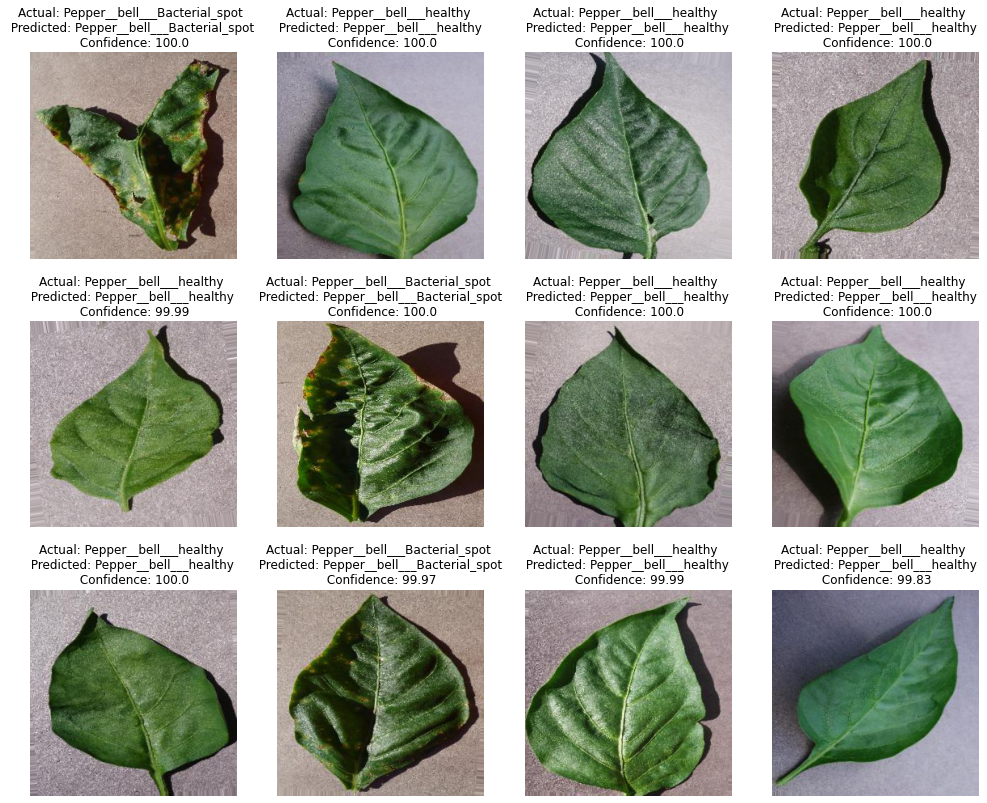

In [ ]:
plt.figure(figsize=(17,14))
for image_batch, label_batch in test_generator:
    
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i])
        
        predicted_class, confidence = predict(model, image_batch[i])
        actual_class = class_names[int(label_batch[i])]

        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}")
        plt.axis('off')
    break